# Business Case study : Leading Institute for study abroad test prep and admission counselling

# Context:

Institute has helped thousands of students like you make it to top colleges abroad. 
Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores
with minimum effort. They recently launched a feature where students/learners can 
come to their website and check their probability of getting into the IVY league college. 
This feature estimates the chances of graduate admission from an Indian perspective.

# Column Profiling:

*Serial No. (Unique row ID)

*GRE Scores (out of 340)

*TOEFL Scores (out of 120)

*University Rating (out of 5)

*Statement of Purpose and Letter of Recommendation Strength (out of 5)

*Undergraduate GPA (out of 10)

*Research Experience (either 0 or 1)

*Chance of Admit (ranging from 0 to 1)

# Importing all the libraries for analyzing the case study

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import warnings
warnings.simplefilter('ignore')

# Defining Problem Statement and Analyzing basic metrics

# Problem Statement 

Your analysis will help Jamboree in understanding what factors 
are important in graduate admissions and how these factors are 
interrelated among themselves. It will also help predict one's 
chances of admission given the rest of the variables.

In [2]:
df = pd.read_csv('all Excel\Institute_Admission.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Insight as follows : The above dataset contain zero Null values. No Missing values.

# Segrating fields with the following data types: categorical, numerical, and target

Categorical column = cat_cols

Numerical column = num_cols

Target = target

In [6]:
column_names = df.columns
column_names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
target = 'Chance of Admit '

In [8]:
df_without_serial = df.drop(columns=['Serial No.'])
summary_stats_without_serial = df_without_serial.describe()
summary_stats_without_serial

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Insight:
1) The mean GRE score out of 340 is 316.47, and the maximum score is 340.

2) The TOEFL score out of 120 is 107.19, and the maximum score is 120.

3) The university rating out of 5 means 3.11, and the maximum is 5.

4) SOP rating out of 5 mean is 3.37 and max is 5

5) LOR rating out of 5 mean is 3.48 and max is 5

6) The CGPA rating out of 10 is 8.57, and the maximum is 9.92.

7) The average chance of admission is 0.72, with a maximum of 0.97.

8) In the above dataset, the mean and median are almost equal in this case.
   
This is a good indicator that the data might be symmetrically distributed.
around the mean, suggesting a roughly normal distribution.

# Non-Graphical Analysis: Value counts and Unique attributes

# Value Counts:

In [9]:
def top_5_stats(df, num_cols):
    top_5_counts = df[num_cols].value_counts().head(5)

    percentage_top_5_counts = (top_5_counts / len(df)) * 100
    print(f"\nTop 5 {num_cols} values percentage:\n{percentage_top_5_counts}")

top_5_stats(df, 'GRE Score')
top_5_stats(df, 'TOEFL Score')
top_5_stats(df, 'CGPA')


Top 5 GRE Score values percentage:
312    4.8
324    4.6
316    3.6
321    3.4
322    3.4
Name: GRE Score, dtype: float64

Top 5 TOEFL Score values percentage:
110    8.8
105    7.4
104    5.8
107    5.6
106    5.6
Name: TOEFL Score, dtype: float64

Top 5 CGPA values percentage:
8.76    1.8
8.00    1.8
8.12    1.4
8.45    1.4
8.54    1.4
Name: CGPA, dtype: float64


In [10]:
def bottom_5_stats(df, num_col):
    bottom_5_counts = df[num_col].value_counts().tail(5)  
    percentage_bottom_5_counts = (bottom_5_counts / len(df)) * 100

    print(f"\nBottom 5 {num_col} values percentage:\n{percentage_bottom_5_counts}")

bottom_5_stats(df, 'GRE Score')
bottom_5_stats(df, 'TOEFL Score')
bottom_5_stats(df, 'CGPA')


Bottom 5 GRE Score values percentage:
339    0.6
337    0.4
290    0.4
294    0.4
293    0.2
Name: GRE Score, dtype: float64

Bottom 5 TOEFL Score values percentage:
96    1.2
95    0.6
93    0.4
94    0.4
92    0.2
Name: TOEFL Score, dtype: float64

Bottom 5 CGPA values percentage:
9.92    0.2
9.35    0.2
8.71    0.2
9.32    0.2
7.69    0.2
Name: CGPA, dtype: float64


# Insights:
1) In GRE, 4.8% have a maximum score of 312.

2) In TOEFL, 8.8% have a max score of 110.

3) A CGPA of 1.8% is a max score of 8.76.

4) In GRE, 0.4% have a minimum score of 290.

6) In TOEFL, 0.2% have a minimum score of 92.

7) A CGPA of 0.2% equals a minimum score of 7.69.

# Unique attributes:

In [11]:
for i in cat_cols:
    print("{:20} : Unique values: {}".format(i, df[i].nunique()))

University Rating    : Unique values: 5
SOP                  : Unique values: 9
LOR                  : Unique values: 9
Research             : Unique values: 2


# Insights:
1) A 5-unique value is used in the above dataset for university rating.

2) A 9-unique value is used in the above dataset for the letter of recommendation strength.

3) A 9-unique value is used in the above dataset for the Statement of Purpose.

3) A two-unique value is used in the above dataset for research.

# Visual Analysis - Univariate & Bivariate

# Univariate

In [12]:
num_col_univar_analysis = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit ']

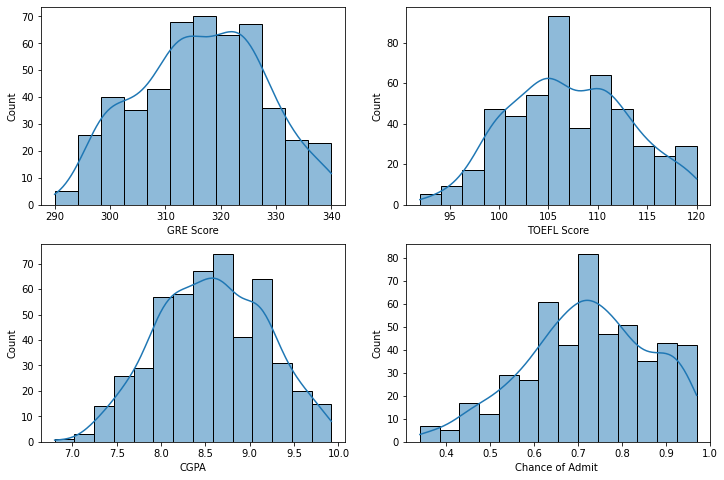

In [13]:
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for i in range(rows):
    for j in range(cols):
        sns.histplot(df[num_col_univar_analysis[index]], kde=True, ax=axs[i,j])
        index += 1
plt.show()

# Insights:
1) The maximum score in the GRE is in the range of 310 to 330

2) The maximum score on the TOEFL is in the range of 105 to 110

3) The maximum people score in CGPA is in the range of 8.0 to 9.2

4) GRE, TOEFL, and CGPA scores are all almost normally distributed.

# Outliers detection using BoxPlots:

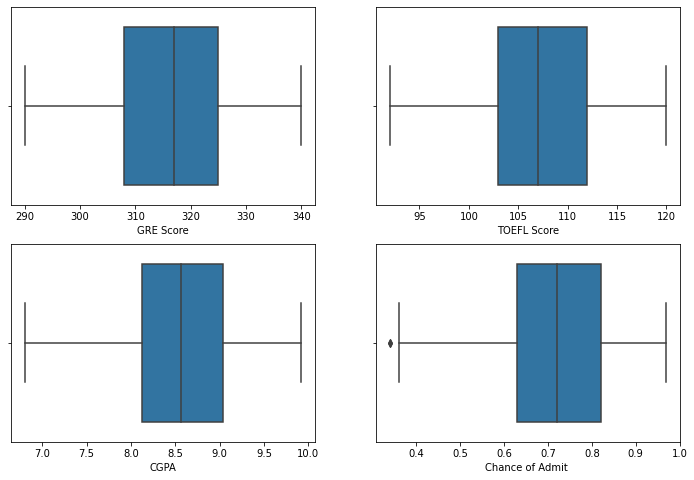

In [14]:
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(x=num_col_univar_analysis[index], data=df, ax=axs[i,j])
        index += 1
plt.show()

# Insights:

1) There are no outliers in the present dataset.

2) 50% of scores in the GRE lie between 310 and 320

3) 50% of the score in TOEFL lies between 105 and 110

4) 50% of the score in CGPA lies between 8.0 and 9.0

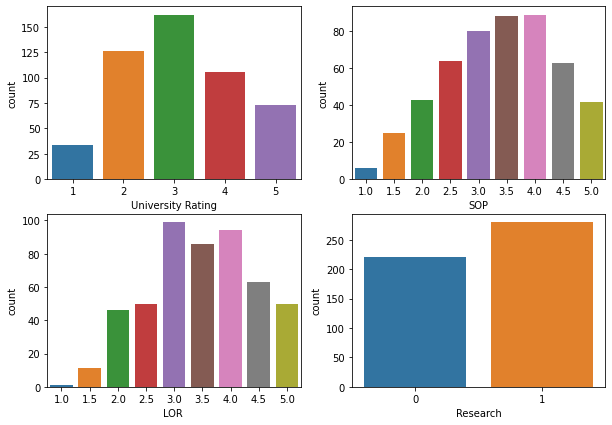

In [15]:
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for i in range(rows):
    for j in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[i,j])
        index += 1
        
plt.show()

# Insights:
1) The maximum university rating ranges from 2 to 4.

2) The Statement of Purpose maximum count lies between 3 and 4.

3) The letter of recommendation strength max count lies between 3 and 4.

4) Research counts are greater than non-research counts.

# Bivariate Analysis

Analyzing the variation in Chance of Admit with the following,

GRE Score vs Chance of Admit

TOEFL Score vs Chance of Admit

CGPA vs Chance of Admit

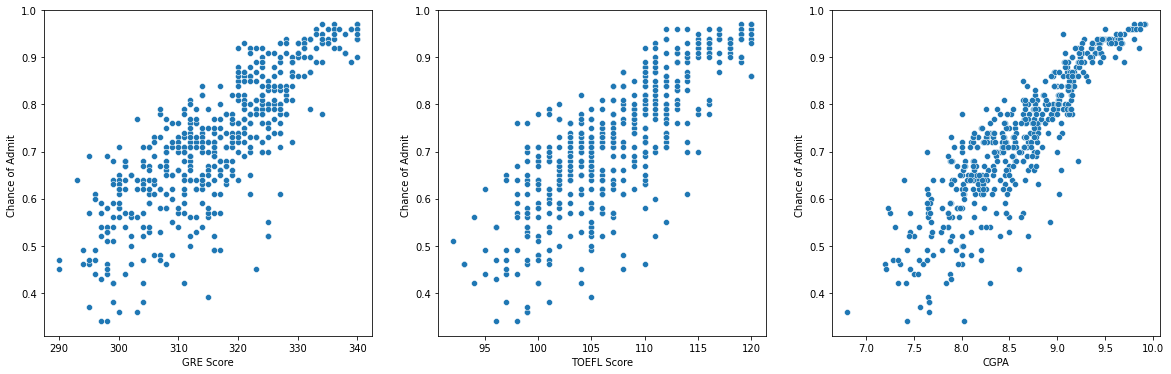

In [16]:
rows = 1
cols = 3  
fig, axs = plt.subplots(rows, cols, figsize=(20, 6))

index = 0
for i in range(cols):
    sns.scatterplot(x=num_cols[index], y=target, data=df, ax=axs[i])
    index += 1
plt.show()

# Insights:
1) There is a linear correlation between the numerical data type and the chances of admission.

2) As the GRE score increases The chances of admission increase.

3) As the TOEFL score increases, the chances of admission increase.

4) As the CGPA score increases The chances of admission increase.

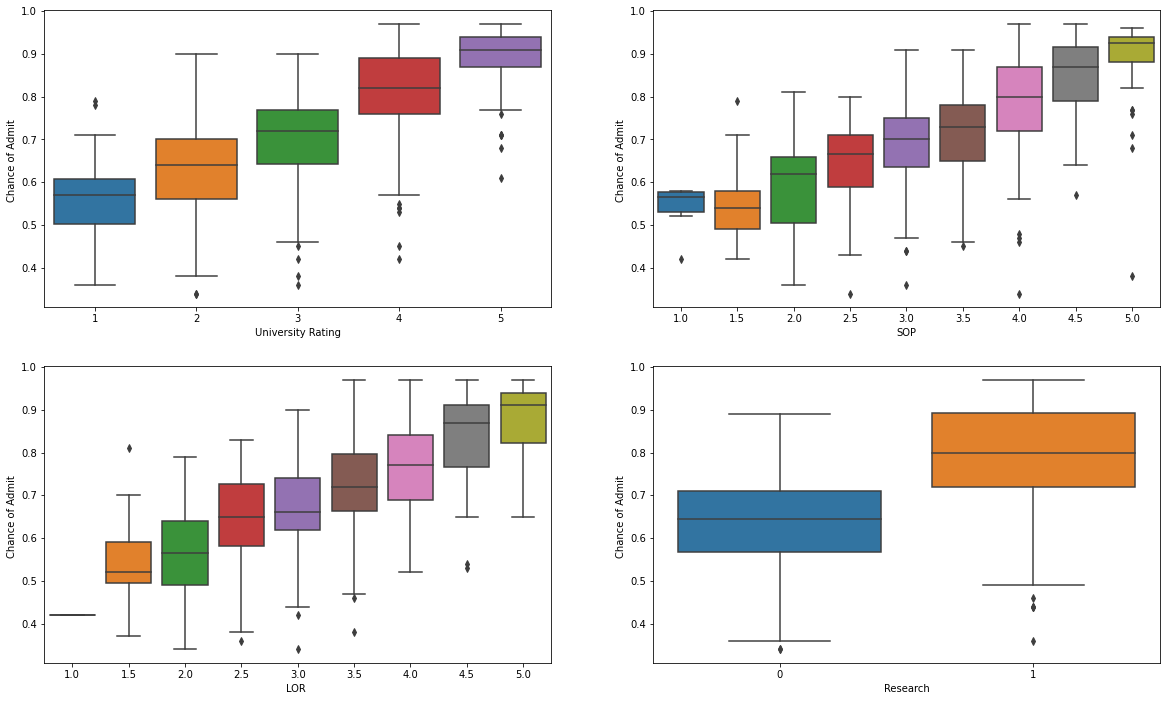

In [17]:
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(20, 12))

index = 0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[i,j])
        index += 1
        
plt.show()

# Insights:
1) University rating increase The chances of admission increase.

2) The Statement of Purpose score is increasing. The chances of admission increase.

3) The letter of recommendation is strong. The chances of admission increase.

4) Candidates with research experience have high chances of admission.

# Multivariate Analysis

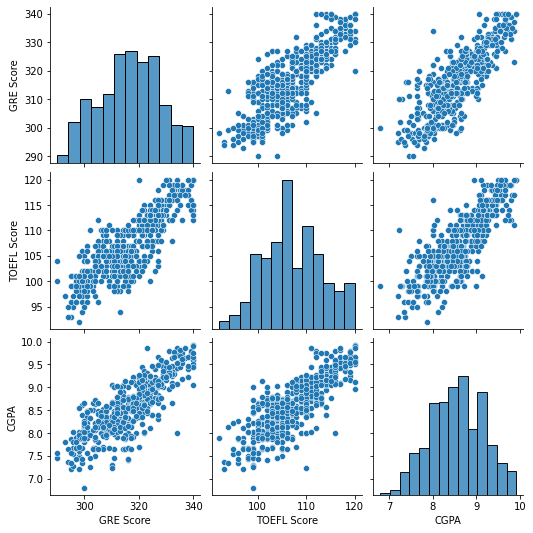

In [18]:
sns.pairplot(df[num_cols])
plt.show()

# Insights:
All the numerical data type are correlated with each other.

In [19]:
df_without_serial.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


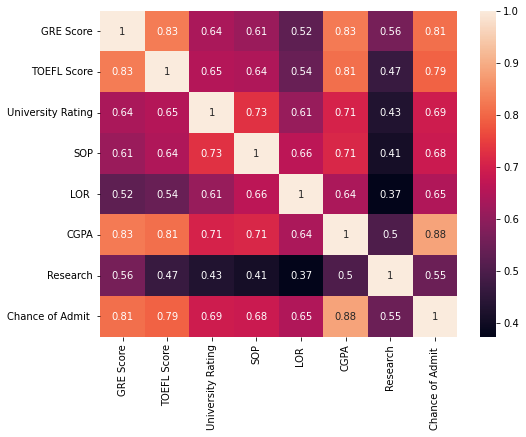

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df_without_serial.corr(), annot=True)
plt.show()

# Insights:
1) The chance of admission has a strong positive correlation with the GRE score.

2) The chance of admission is strongly correlated with the TOEFL score.

3) The chance of admission has a positive, moderate correlation with the university rating.

4) The chance of admission has a positive, moderate correlation with the Statement of Purpose score.

5) The chance of admission has a positive, moderate correlation with the letter of recommendation.

6) The chance of admission is strongly correlated with the CGPA.

7) The chance of admission has a positive, moderate correlation with research.

# Data preparation for model building

In [21]:
X = df_without_serial.drop(columns=[target])
y = df_without_serial[target]

In [22]:
# standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(100, 7) (100,)
(400, 7) (400,)


# Insights:

1) X consider as feature and y as target.

2) standardize the X feature dataset

3) Split the dataset into train and test in ratio od 80:20 , for traing data 80% and test data is 20%


# Model Building

In [25]:
def adjusted_r2(r2, predict, n_sam):
    """
    n_sam: the number of samples in the dataset.
    
    predict: the number of predictors in the model.
    
    r2: the R-squared score of the model.
    """
    adj_r2 = 1 - ((1-r2)*(n_sam-1) / (n_sam-predict-1))
    return adj_r2

def get_metrics(y_true, y_pred, predict=None):
    n_sam = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n_sam
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if predict is not None:
        adj_r2 = adjusted_r2(score, predict, n_sam)
        
    result = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return result

In [26]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*40)
    return model

In [27]:
train_model(X_train, y_train, X_test, y_test,df_without_serial.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df_without_serial.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df_without_serial.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.7228813180778462
              Column      Coef
0          GRE Score  0.020675
1        TOEFL Score  0.019284
2  University Rating  0.007001
3                SOP  0.002975
4               LOR   0.013338
5               CGPA  0.070514
6           Research  0.009873
----------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: 0.722883615670641
              Column      Coef
0          GRE Score  0.020872
1        TOEFL Score  0.019405
2  University Rating  0.007082
3                SOP  0.003122
4               LOR   0.013381
5               CGPA  0.069874
6           Research  0.009890
-----------------------

Lasso(alpha=0.001)

# Insights:

1) Since the model is not overfitting, the results for linear, ridge, and lasso are the same.

2) R2_score and adjusted_r2 are almost the same. Hence, there are no unnecessary independent variables in the data.

3) The models, especially Linear Regression, seem to be performing well on the given data.

4) The consistency in performance metrics across models (MAE, RMSE, R2 Score, Adjusted R2) suggests that regularization did not bring substantial improvement in this particular case

# Linear Regression Model - Assumption Test


# Mutlicollinearity Check


In [28]:
def vif(newdata):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["features"] = newdata.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdata.values, i) for i in range(len(newdata.columns))]
    return vif_data

In [29]:
#calculating the VIF for all features
result = vif(df_without_serial.iloc[:,:-1])
result

,features,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [30]:
# drop TOEFL Score and again calculate the VIF
result = vif(df_without_serial.iloc[:,2:-1])
result

,features,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [31]:
# drop the SOP and again calculate VIF
result  = vif(df_without_serial.iloc[:,2:-1].drop(columns=['SOP']))
result

,features,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [32]:
# drop the LOR and again calculate VIF
result = vif(df_without_serial.iloc[:, 2:-1].drop(columns=['LOR ', 'SOP']))
result

,features,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [33]:
# drop the University Rating and again calculate VIF
result = vif(df_without_serial.iloc[:, 2:-1].drop(columns=['LOR ', 'SOP', 'University Rating']))
result

,features,VIF
0,CGPA,2.455008
1,Research,2.455008


# Insights:

1) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

2) Train the model with these two features

In [34]:
# train the model with above two features
X = df[['CGPA', 'Research']]
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.05 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.79 Test R2_score: 0.8
Train Adjusted_R2: 0.79 Test Adjusted_R2: 0.8
Intercept: 0.7228360053106414
     Column      Coef
0      CGPA  0.115963
1  Research  0.017047
----------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.05 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.79 Test R2_score: 0.8
Train Adjusted_R2: 0.79 Test Adjusted_R2: 0.8
Intercept: 0.7228329936065757
     Column      Coef
0      CGPA  0.115606
1  Research  0.017185
----------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.05 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.79 Test R2_score: 0.8
Train Adjusted_R2: 0.79 Test Adjusted_R2: 0.8
Intercept: 0.7228165842981557
     Column      Coef
0      CGPA  0.115304
1  Research  0.016383
----------------------------------------


Lasso(alpha=0.001)

# Insights:

1) All three models (Linear, Ridge, and Lasso) show similar performance metrics, indicating that regularization techniques (Ridge and Lasso) did not significantly improve or degrade the model performance compared to the basic Linear Regression.

2) The R2 scores for both training and testing sets are reasonably high, suggesting that the models capture a good portion of the variance in the target variable.

3) After removing collinear features using VIF and using only two features, R2_score and adjusted_r2 are still the same as before the testing dataset.

4) Mean of Residuals :
   RMSE is 0.06 these value is almost zero
   
5) Features are independent, but all are linearly dependent on the target.

# Test for Homoscedasticity

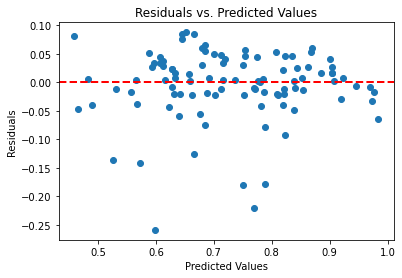

In [36]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2) 
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


# Insights :

The spread of residuals appears to be not constant as you move along the predicted values,
Therefore there is no homoscedasticity present in the data

# Normality of residuals

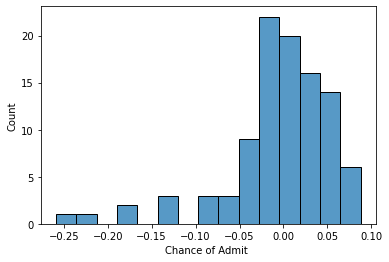

In [37]:
sns.histplot(residuals)
plt.show()

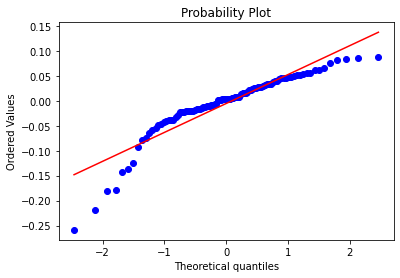

In [38]:
stats.probplot(residuals, plot=plt)
plt.show()

# Insight:

1) The histogram is not normally distributed.

2) The points on the plot are not close to the diagonal line, which suggests that the residuals do not follow a normal distribution.

# Recommendations

1) CGPA and Research are two import feature for high chance of admission

2) The chance of admission is strongly correlated with the CGPA.

3) As the GRE score increases The chances of admission increase.

4) As the TOEFL score increases, the chances of admission increase.

5) Candidates with research experience have high chances of admission.

******************************************************************************************